# **Week 3** 

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np



## **1- Thresholding**



Thresholding is the simplest type of **image segmentation**, where we change the pixels of an image to make the image easier to analyze. In thresholding, we convert an image from colour or grayscale into a binary image, i.e., one that is simply black and white. We can use thresholding as a way to select areas of interest of an image, while ignoring the parts we are not concerned with.

The simplest thresholding methods replace each pixel in an image with a black pixel if the pixel intensity is less than a fixed value called the threshold T, or a white pixel if the pixel intensity is greater than that threshold.

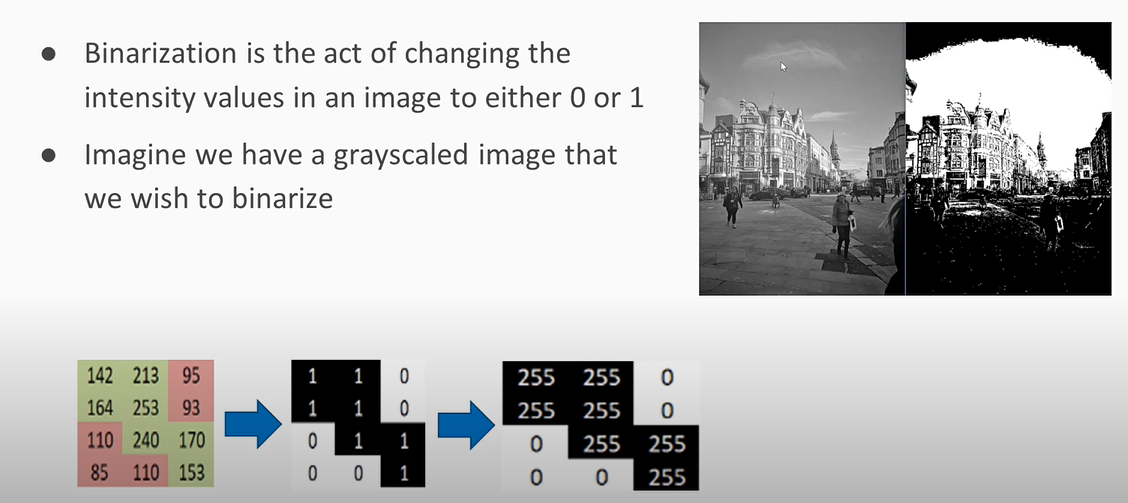

### Simple Thresholding

For every pixel, the same threshold value is applied. If the pixel value is smaller than the threshold, it is set to 0, otherwise it is set to a maximum value. The function cv.threshold is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold. OpenCV provides different types of thresholding which is given by the fourth parameter of the function.

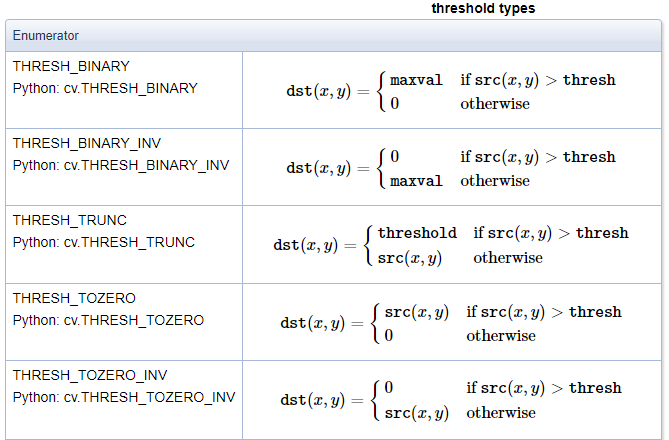

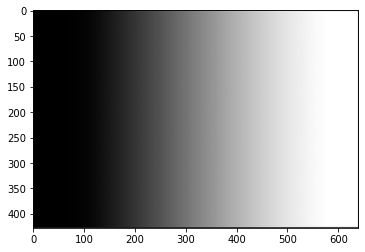

In [ ]:
img=cv2.imread('gradient.jpg')
plt.imshow(img,cmap='gray')

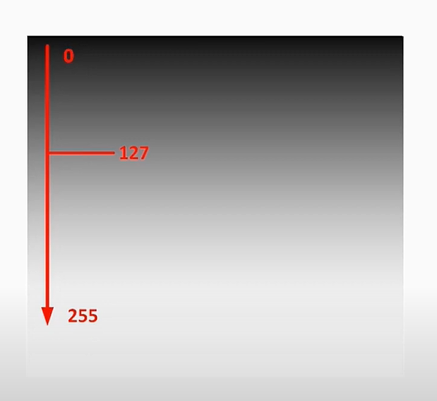

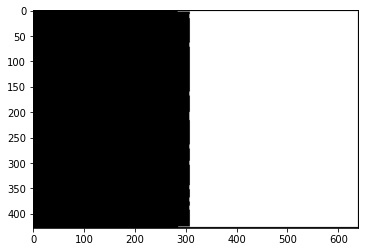

In [ ]:
_,thresh_1=cv2.threshold(img,120,255,cv2.THRESH_BINARY)
plt.imshow(thresh_1,cmap='gray')


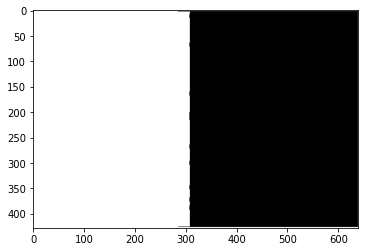

In [ ]:
_,thresh_2=cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh_2,cmap='gray')


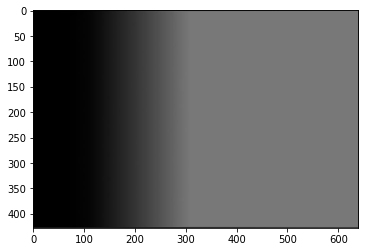

In [ ]:
_,thresh_3=cv2.threshold(img,120,255,cv2.THRESH_TRUNC)
plt.imshow(thresh_3,cmap='gray')

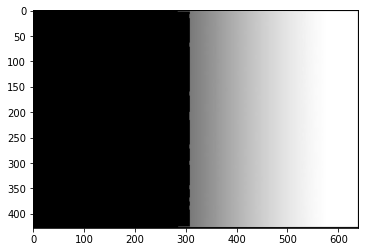

In [ ]:
_,thresh_4=cv2.threshold(img,120,255,cv2.THRESH_TOZERO)
plt.imshow(thresh_4,cmap='gray')

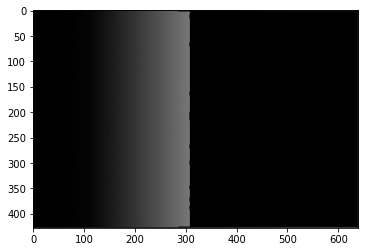

In [ ]:
_,thresh_5=cv2.threshold(img,120,255,cv2.THRESH_TOZERO_INV)
plt.imshow(thresh_5,cmap='gray')

### Adaptive Thresholding

In simple thresholding, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

The **adaptiveMethod** decides how the threshold value is calculated:

* cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant **C**.
* cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant **C**.

### cv2.adaptive Threshold


1. Input image
2. Maximum value assigned to the pixels for which condition is satisfied
3. The parameter adaptive Method decides how threshold is calculated
• cv2.ADAPTIVE THRESH MEAN C: The threshold value is the mean of the
neighborhood area minus the constant C.
• cv2.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted
sum of the neighborhood values minus the constant C.
4. Type of
thresholding
5. blockSize determines the size of the neighborhood area
6.
C is a constant that is subtracted from the mean or weighted sum of the
neighborhood pixels.

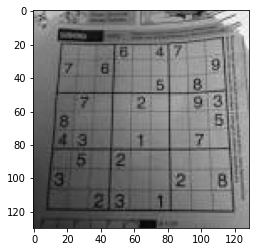

In [ ]:
sudoku_img = cv2.imread('sudoku.jpg',0)
plt.imshow(sudoku_img,cmap='gray')

In [ ]:
region_1=sudoku_img[20:50,20:50]
region_2=sudoku_img[80:120,80:120]

(array([  2.,  28.,  51.,  47., 266., 501.,   5.,   0.,   0.,   0.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

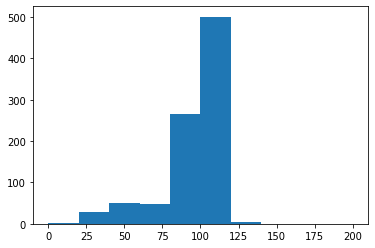

In [ ]:
plt.hist(region_1.ravel(),range=[0,200])

(array([  2.,  15.,  76., 105., 150., 437., 721.,  94.,   0.,   0.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <BarContainer object of 10 artists>)

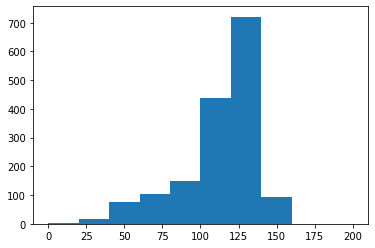

In [ ]:
plt.hist(region_2.ravel(),range=[0,200])

In [ ]:
_,thresh_1 = cv2.threshold(sudoku_img,127,255,cv2.THRESH_BINARY)

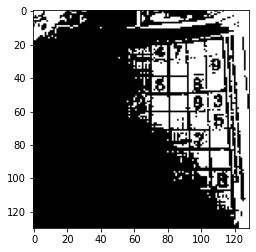

In [ ]:
plt.imshow(thresh_1,cmap='gray')

### Adaptive Thresholding
The biggest downfall of those simple
threshold methods is that we to provide
the threshold value; adaptive threshold
methods take that uncertainty away
cv2.aptiveThreshold (image, Max Value,
Adaptive type, Threshold Type, Block size,
Constant that is subtracted from mean)
Note: Block sizes need to be
odd numbers.

**Adaptive thresholding** is the method where the threshold value is calculated for smaller regions and therefore, there will be different threshold values for different regions.

In [ ]:
thresh_6 = cv2.adaptiveThreshold(sudoku_img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)

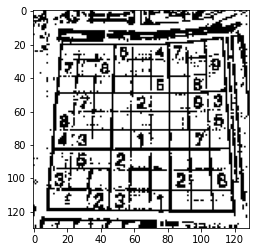

In [ ]:
plt.imshow(thresh_6,cmap='gray')

In [ ]:
thresh_7 = cv2.adaptiveThreshold(sudoku_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

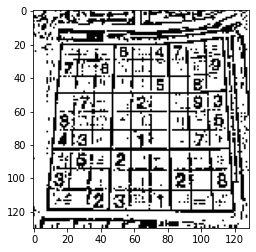

In [ ]:
plt.imshow(thresh_7,cmap='gray')

### Otsu Thresholding


Otsu's algorithm tries to find a threshold that minimizes intra-class intensity variance, or equivalently, by maximizes inter-class variance.

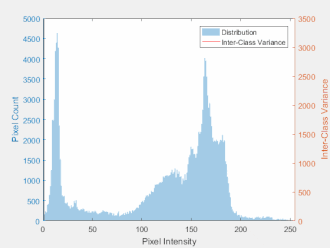

In [ ]:
noisy_img = cv2.imread('noisy_img.jpg',0)

# global thresholding
_,thresh_1 = cv2.threshold(noisy_img,100,255,cv2.THRESH_BINARY)

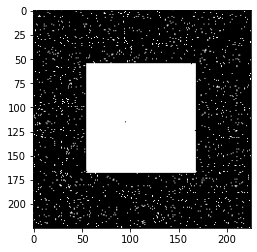

In [ ]:
plt.imshow(thresh_1,cmap='gray')

In [ ]:
# Otsu's thresholding
optimal_thresh,thresh_8 = cv2.threshold(noisy_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

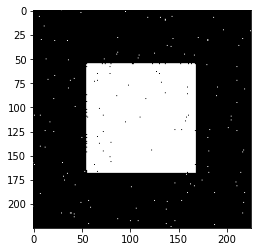

In [ ]:
plt.imshow(thresh_8,cmap='gray')

In [ ]:
optimal_thresh

128.0



## **2- Image Enhancement**
It is a method that improves the contrast in an image, in order to stretch out the intensity range. Equalization implies mapping one distribution (the given histogram) to another distribution (a wider and more uniform distribution of intensity values) so the intensity values are spread over the whole range.



### Histogram Equalization



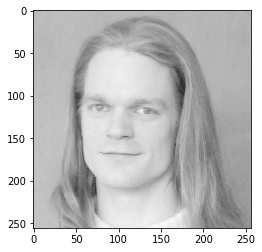

In [ ]:
low_cont_img=cv2.imread("low-contrast-image.png",0)
plt.imshow(low_cont_img,cmap='gray')

(array([2.0000e+00, 4.2000e+01, 2.4500e+02, 6.7300e+02, 3.3820e+03,
        7.5830e+03, 1.5541e+04, 2.2619e+04, 1.1617e+04, 3.8320e+03]),
 array([143., 154., 165., 176., 187., 198., 209., 220., 231., 242., 253.]),
 <BarContainer object of 10 artists>)

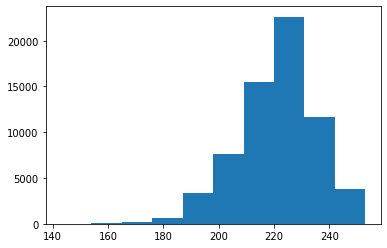

In [ ]:
plt.hist(low_cont_img.ravel())

In [ ]:
hist_eq = cv2.equalizeHist(low_cont_img)


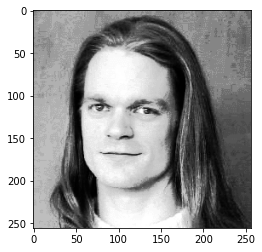

In [ ]:
plt.imshow(hist_eq,cmap='gray')

(array([ 5593.,  6334.,  7307.,  4757.,  3477.,  6785., 11092.,  6166.,
         5288.,  8737.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

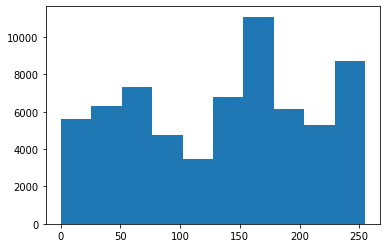

In [ ]:
plt.hist(hist_eq.ravel())

To make it clearer, from the example above, you can see that the pixels seem clustered around the middle of the available range of intensities. What Histogram Equalization does is to stretch out this range, which makes pixels obtain wider range of values making objects more distinctive, which enhances image's quality).

### Gamma Correction



Gamma correction is used to correct the differences between the way a camera captures content, the way a display displays content, and the way our visual system processes light. Our eyes do not respond to light in the same way that a camera captures it.

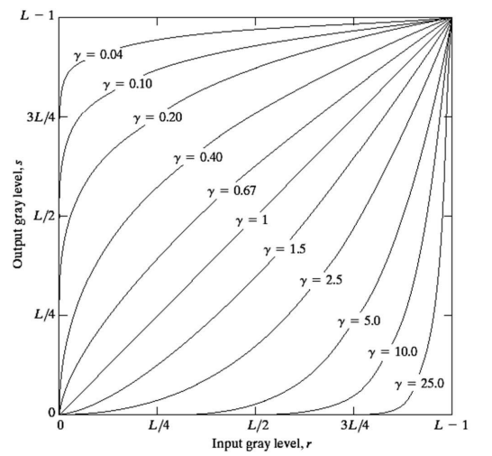

Compared to a camera, we are much more sensitive to changes in dark tones than we are to similar changes in bright tones. There's a biological reason for this peculiarity: it enables our vision to operate over a broader range of luminance. Otherwise the typical range in brightness we encounter outdoors would be too overwhelming.

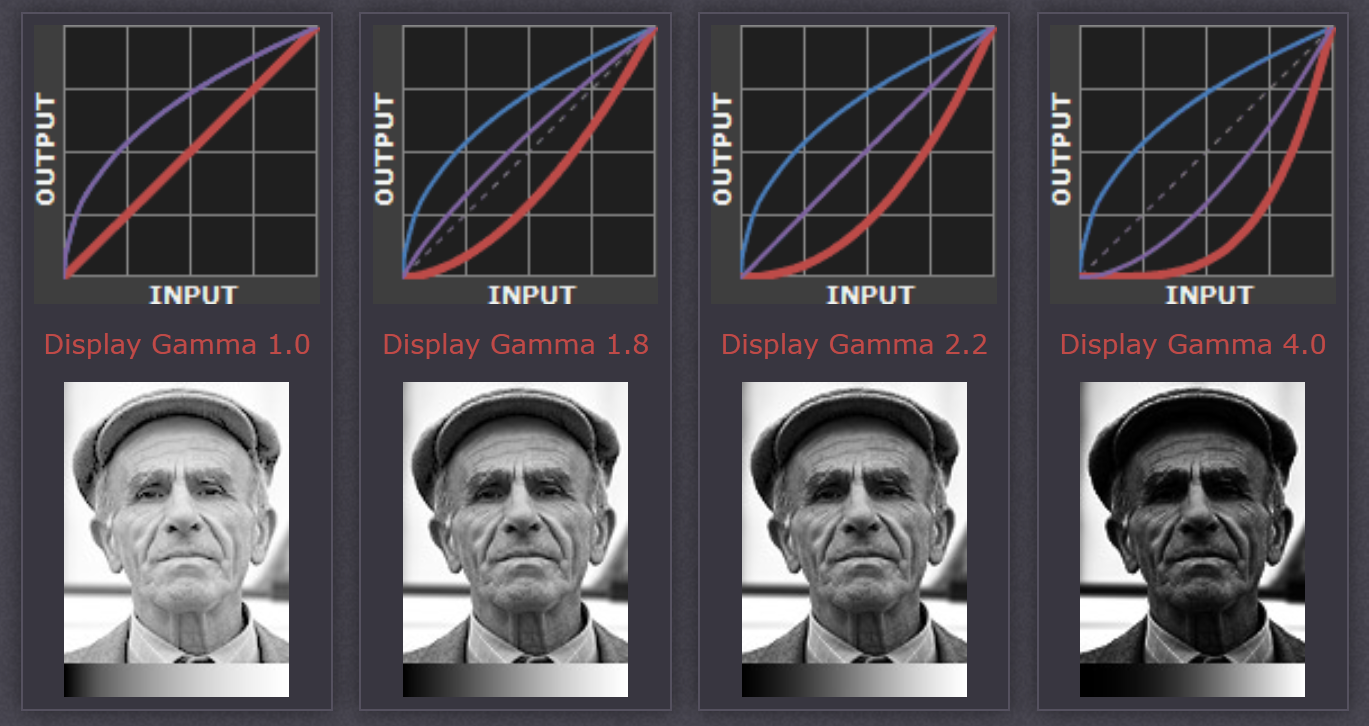

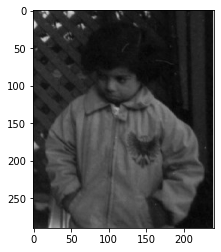

In [ ]:
low_cont_img=cv2.imread("low_cont.jpg",0)
plt.imshow(low_cont_img,cmap='gray')

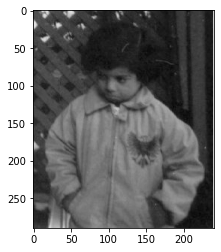

In [ ]:
gamma=0.1
new_img=((low_cont_img/255)**gamma)*255
plt.imshow(new_img,cmap='gray')

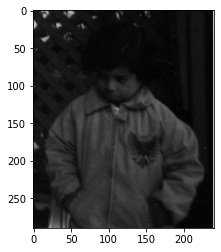

In [ ]:
gamma=2
new_img=((low_cont_img/255)**gamma)*255
plt.imshow(new_img,cmap='gray')

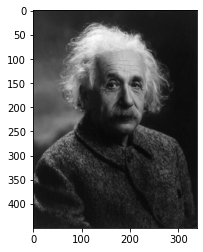

In [ ]:
albert_img=cv2.imread("albert.jpg",0)
plt.imshow(albert_img,cmap='gray')

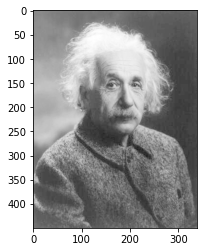

In [ ]:
# Apply log transformation method
c = 255 / np.log(1 + np.max(albert_img))
log_image = c * (np.log(albert_img + 1))
   
# Specify the data type so that
# float value will be converted to int
log_image = np.array(log_image, dtype = np.uint8)
plt.imshow(log_image,cmap='gray')